In [1]:
#1
import re
import pandas as pd
from xml.sax.handler import feature_string_interning
from sklearn import datasets

df = pd.read_csv('winequality-red.csv')

feature_names = df.columns.values
target_names = ["3", "4", "5", "6", "7", "8"]

Predictors = df.drop("quality", axis = 1)
y = df["quality"]
print(Predictors)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [2]:
#2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 3
model = DecisionTreeClassifier(max_depth = max_depth)
model.fit(Predictors, y)
pred = model.predict(Predictors)
print(accuracy_score(y, pred))

0.5784865540963102


<bound method Figure.show of <Figure size 1800x1440 with 1 Axes>>

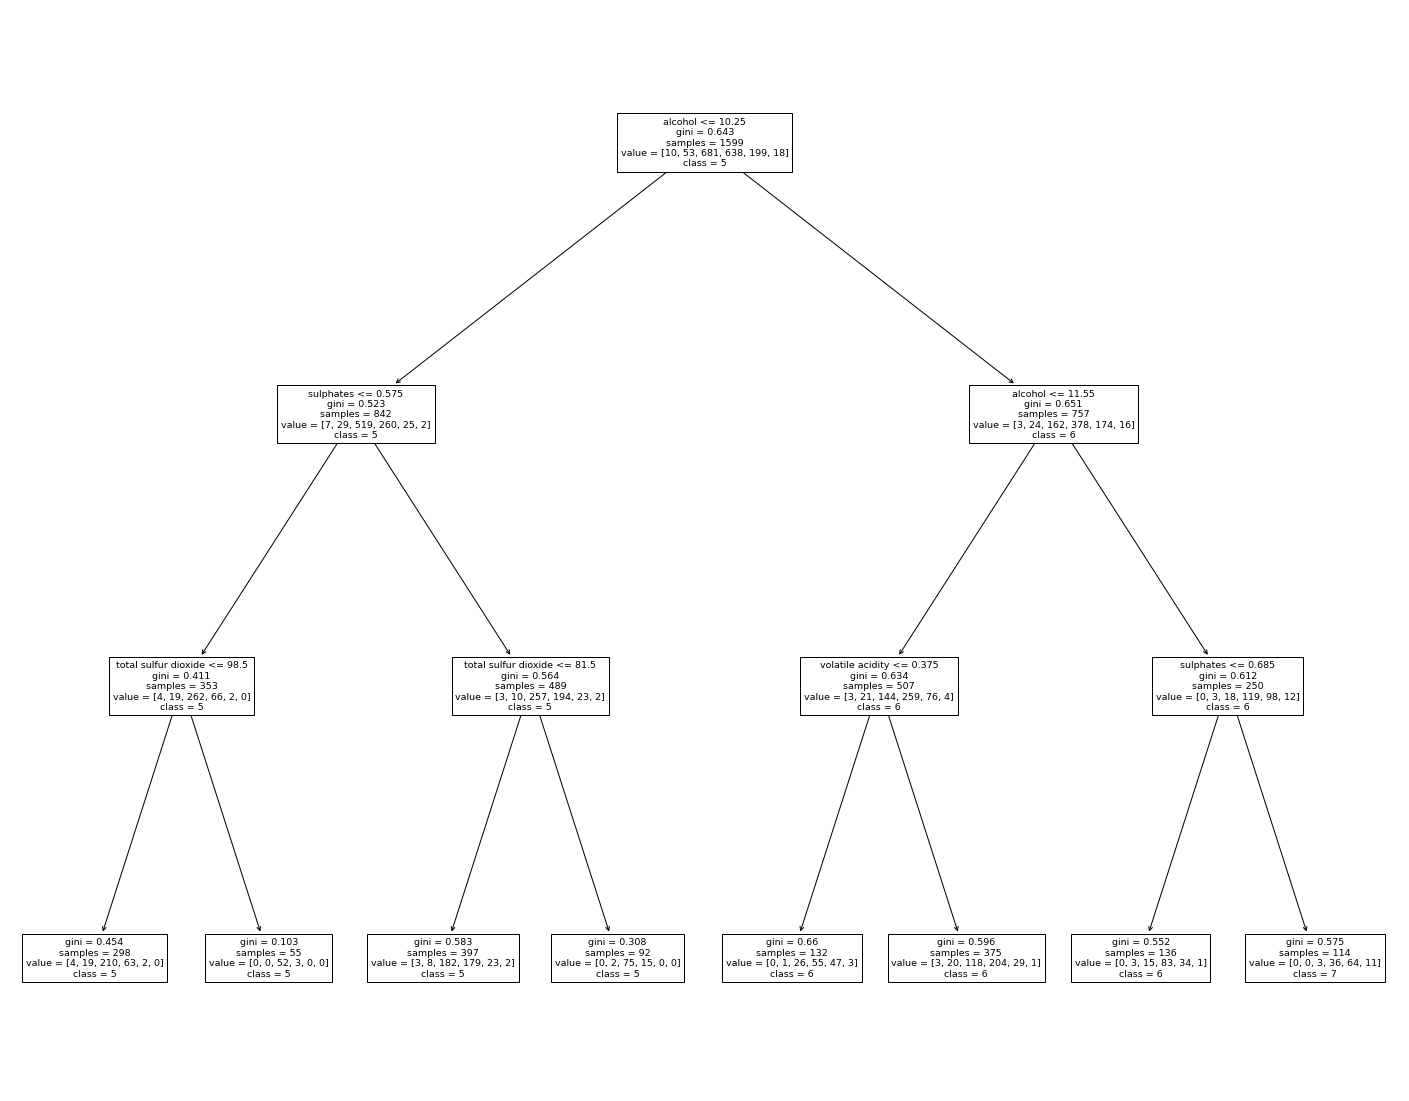

In [3]:
#3
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model, feature_names=feature_names, class_names=target_names)
fig.savefig('tree.png')
fig.show

In [4]:
#4 

from joblib import dump

dump(model, 'tree.joblib')

['tree.joblib']

In [5]:
#5 Datalog

!pip install pyDatalog

from pyDatalog import pyDatalog

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# #6
# print(V==1)

In [7]:
# #7
# print((V==1) & (U==2))

In [8]:
# #8
# grade['student1'] = 5
# grade['student2'] = 2
# print(grade[U] == V)

In [9]:
# #9
# (credit[U] == True) <= (grade[U] >= 3)
# print(credit[U] == V)

In [10]:
#10
pyDatalog.create_terms('X, Y, alcohol, sulphates, volatile_acidity, total_sulfur_dioxide, label')

In [11]:
#11
(label[X] == '5') <= (alcohol[X] <= 10.25)
(label[X] == '6') <=  (alcohol[X] > 10.25) & (alcohol[X] <= 11.55)
(label[X] == '6') <= (alcohol[X] > 11.55) & (sulphates[X] <= 0.685)
(label[X] == '7') <= (alcohol[X] > 11.55) & (sulphates[X] > 0.685)

label[1]==(*,X,'7') <= alcohol[1]>(*,X,'11.55')&su

In [12]:
#12
# Test 1 (5)
alcohol[0] = 2
sulphates[0] = 22
print(label[0] == X, end='\n\n')

# Test 2 (6)
alcohol[1] = 11
sulphates[1] = 70
print(label[1] == X, end='\n\n')

# Test 3 (6)
alcohol[2] = 21
sulphates[2] = 0
print(label[2] == X, end='\n\n')

# Test 4 (7)
alcohol[3] = 20
sulphates[3] = 21
print(label[3] == X, end='\n\n')

X
-
5

X
-
6

X
-
6

X
-
7



In [13]:
#12
volatile_acidity[0] = 0.7
total_sulfur_dioxide[0] = 34.0
sulphates[0] = 0.56
alcohol[0] = 9.4

In [14]:
#13

from joblib import load
import sklearn

model = load('tree.joblib')
classes = model.classes_
tree = model.tree_

n_nodes = tree.node_count
children_left = tree.children_left
children_right = tree.children_right
feature = tree.feature
threshold = tree.threshold
value = tree.value

In [15]:
#14
def get_paths(paths):
    for path in paths:
        left = children_left[path[-1]]
        right = children_right[path[-1]]
        if left != right:
            paths.remove(path)
            paths.append(path + [left])
            paths.append(path + [right])
            #paths.append([right])
            get_paths(paths)
    return paths

paths = [[0]]
paths = get_paths(paths)
paths

[[0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 5, 6],
 [0, 1, 5, 7],
 [0, 8, 9, 10],
 [0, 8, 9, 11],
 [0, 8, 12, 13],
 [0, 8, 12, 14]]

In [16]:
#15
rules = []
for path in paths:
    conjuncts = []
    for i in range(len(path)):
        node = path[i]
        if node == path[-1]:
            samples = list(value[node][0])
            label = samples.index(max(samples))
        else:
            conjunct = {'feature': feature[node], 
                       'threshold': round(threshold[node], 2)}
            child = path[i + 1]
            if child in children_left:
                conjunct['comparison'] = '<='
            else:
                conjunct['comparison'] = '>'
            conjuncts.append(conjunct)
    rules.append({'label': label, 'conjuncts': conjuncts})

rules

[{'label': 2,
  'conjuncts': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.57, 'comparison': '<='},
   {'feature': 6, 'threshold': 98.5, 'comparison': '<='}]},
 {'label': 2,
  'conjuncts': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.57, 'comparison': '<='},
   {'feature': 6, 'threshold': 98.5, 'comparison': '>'}]},
 {'label': 2,
  'conjuncts': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.57, 'comparison': '>'},
   {'feature': 6, 'threshold': 81.5, 'comparison': '<='}]},
 {'label': 2,
  'conjuncts': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.57, 'comparison': '>'},
   {'feature': 6, 'threshold': 81.5, 'comparison': '>'}]},
 {'label': 3,
  'conjuncts': [{'feature': 10, 'threshold': 10.25, 'comparison': '>'},
   {'feature': 10, 'threshold': 11.55, 'comparison': '<='},
   {'feature': 1, 'threshold': 0.38, '

In [17]:
#16
from sklearn import datasets

def format_name(name):
    name = str(name)
    name = name.replace(' ', '_')
    name = name.replace('(', '')
    name = name.replace(')', '')
    return name

feature_names = [format_name(x) for x in feature_names]
target_names = [f"'{x}'" for x in target_names]
print(feature_names)
print(target_names)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
["'3'", "'4'", "'5'", "'6'", "'7'", "'8'"]


In [18]:
#17
tmplts = []
for rule in rules:
    label = target_names[rule['label']]
    tmplt_label = f'(label[X] == {label})'
    conjuncts = rule['conjuncts']
    if conjuncts:
        conditions = []
        for conjunct in conjuncts:
            feature_name = feature_names[conjunct['feature']]
            conditions.append(f'({feature_name}[X] {conjunct["comparison"]} {conjunct["threshold"]})')
            tmplt_condition = ' & '.join(conditions)
            tmplts.append(f'{tmplt_label} <= {tmplt_condition}')
        else:
            tmplts.append(tmplt_label)

tmplts

["(label[X] == '5') <= (alcohol[X] <= 10.25)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] <= 0.57)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] <= 0.57) & (total_sulfur_dioxide[X] <= 98.5)",
 "(label[X] == '5')",
 "(label[X] == '5') <= (alcohol[X] <= 10.25)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] <= 0.57)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] <= 0.57) & (total_sulfur_dioxide[X] > 98.5)",
 "(label[X] == '5')",
 "(label[X] == '5') <= (alcohol[X] <= 10.25)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] > 0.57)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] > 0.57) & (total_sulfur_dioxide[X] <= 81.5)",
 "(label[X] == '5')",
 "(label[X] == '5') <= (alcohol[X] <= 10.25)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] > 0.57)",
 "(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] > 0.57) & (total_sulfur_dioxide[X] > 81.5)",
 "(label[X] == '5')",
 "(label[X

In [19]:
#18
feature_indices = [x for x in set(feature) if x>= 0]
predicates = ', '.join([feature_names[x] for x in  feature_indices])
pyDatalog.create_terms('X, Y, label, ' + predicates)

In [20]:
#19
tmplts.reverse()
knowledge = """\n""".join(tmplts)
print(knowledge)
pyDatalog.load(""" 
""" + knowledge + """ 
""")
print(knowledge)

(label[X] == '7')
(label[X] == '7') <= (alcohol[X] > 10.25) & (alcohol[X] > 11.55) & (sulphates[X] > 0.69)
(label[X] == '7') <= (alcohol[X] > 10.25) & (alcohol[X] > 11.55)
(label[X] == '7') <= (alcohol[X] > 10.25)
(label[X] == '6')
(label[X] == '6') <= (alcohol[X] > 10.25) & (alcohol[X] > 11.55) & (sulphates[X] <= 0.69)
(label[X] == '6') <= (alcohol[X] > 10.25) & (alcohol[X] > 11.55)
(label[X] == '6') <= (alcohol[X] > 10.25)
(label[X] == '6')
(label[X] == '6') <= (alcohol[X] > 10.25) & (alcohol[X] <= 11.55) & (volatile_acidity[X] > 0.38)
(label[X] == '6') <= (alcohol[X] > 10.25) & (alcohol[X] <= 11.55)
(label[X] == '6') <= (alcohol[X] > 10.25)
(label[X] == '6')
(label[X] == '6') <= (alcohol[X] > 10.25) & (alcohol[X] <= 11.55) & (volatile_acidity[X] <= 0.38)
(label[X] == '6') <= (alcohol[X] > 10.25) & (alcohol[X] <= 11.55)
(label[X] == '6') <= (alcohol[X] > 10.25)
(label[X] == '5')
(label[X] == '5') <= (alcohol[X] <= 10.25) & (sulphates[X] > 0.57) & (total_sulfur_dioxide[X] > 81.5)
(lab

In [21]:
#20
x = 0 
row = Predictors.iloc[x]
for i in feature_indices:
    fact = f'{feature_names[i]}[{x}] = {row[i]}'
    print(fact)
    exec(fact)

volatile_acidity[0] = 0.7
total_sulfur_dioxide[0] = 34.0
sulphates[0] = 0.56
alcohol[0] = 9.4


In [22]:
#21
print(pyDatalog.ask('label[X] == Y'))

{(0, '5'), (1, '6'), (2, '6'), (3, '6')}
